## **04. SVD(Singular Value Decomposition)**

### **SVD 개요**

- SVD 역시 PCA와 유사한 행렬 분해 기법 이용
- PCA: 정방행렬만을 고유벡터로 분해 가능
- SVD: 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용 가능
- 일반적으로 SVD는 mxn 크기의 행렬 A를 다음과 같이 분해하는 것을 의미
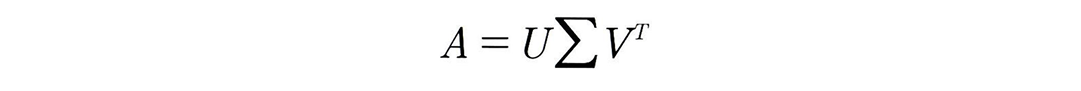
- SVD는 특이값 분해로 불림
- 행렬 U와 V에 속한 벡터는 특이벡터(sigular matrix)이며, 모든 특이벡터는 서로 직교하는 성질을 지님
- Sigma는 대각행렬이며, 시그마의 0이 아닌 값이 행렬 A의 특이값
- SVD는 A의 차원이 mxn일 때 U의 차원이 mxm, Sigma의 차원이 mxn, Vt의 차원이 nxn으로 분해
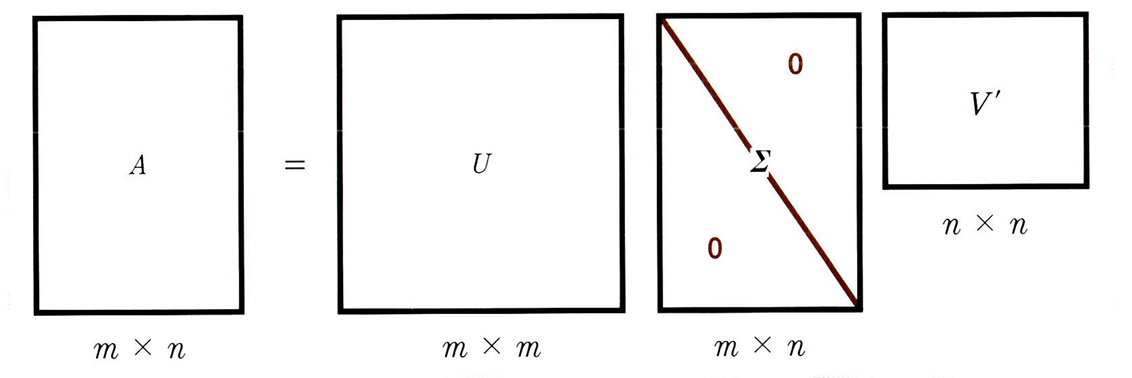
- BUT 일반적으로는 다음과 같이 Sigma의 비대각인 부분과, 대각원소 중에 특이값이 0인 부분도 모두 제거하고, 제거된 Sigma에 대응되는 U와 V 원소도 함께 제거해 차원을 줄인 형태로 SVD를 적용함
- 이렇게 컴팩트한 형태로 SVD를 적용하면, A의 차원이 mxn일 때, U의 차원을 mxp, Sigma의 차원을 pxp, Vt의 차원을 pxn으로 분해
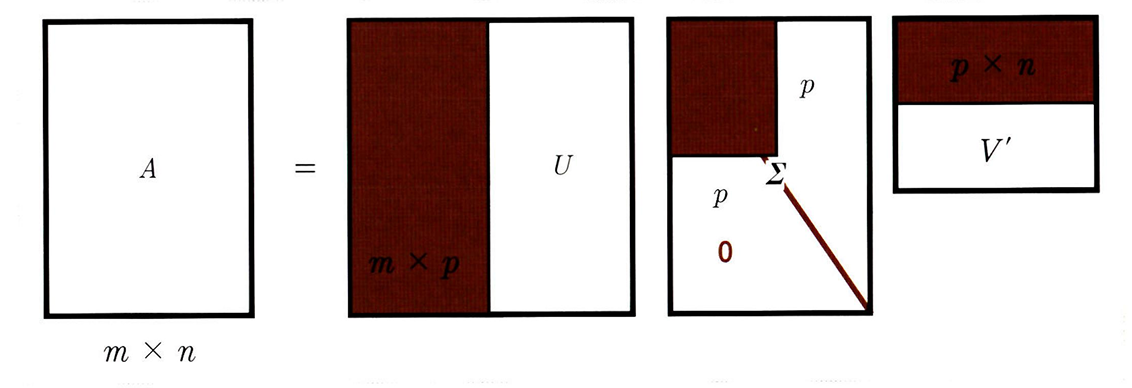
- Truncated SVD: Sigma의 대각원소 중에 상위 몇 개만 추출해서 여기에 대응하는 U와 V의 원소도 함께 제거해 차원을 더 줄인 형태로 분해

- 일반적인 SVD는 보통 넘파이나 사이파이 라이브러리를 이용해 수행
- 넘파이의 SVD를 이용해 svd 연산 수행

In [1]:
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4x4 랜덤 행렬 a 생성
## 랜덤 행렬을 생성하는 이유: 행렬의 개별 로우끼리의 의존성을 없애기 위해서
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 이렇게 생성된 a 행열에 SVD를 적용해 U, Sigma, Vt 도출
- SVD 분해: numpy.linalg.svd에 파라미터로 원본 행렬을 입력하면 U 행렬, Sigma 행렬, V 전치 행렬을 반환
- Sigma 행렬의 경우 0이 아닌 값의 경우만 1차원 행렬로 표현됨

In [3]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', np.round(U,3))
print('Sigma Value:\n', np.round(Sigma, 3))
print('V transpose matrix:\n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


- 분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인
- 원본 행렬로의 복원: U, Sigma, Vt를 내적하기
- 유의할 점: Sigma의 경우 0이 ㅇ닌 값만 1차원으로 추출했으므로 다시 0을 포함한 대칭행렬로 변환한 뒤에 내적을 수행해야 함

In [4]:
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


- 이번에는 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보자
- 일부러 의존성을 부여하기 위해, a행렬의 3번째 로우를 '1st row + 2nd row'로 업데이트하고, '4th row = 1st row'로 업데이트

In [5]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- 이제 a행렬은 이전과 다르게 로우 간 관계가 매우 높아짐
- 이 데이터를 SVD로 다시 분해해보자

In [6]:
# 다시 SVD를 수행해 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n', np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


- 이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변함
- 즉, 선형 독립인 로우 벡터의 개수가 2개라는 뜻 (행렬의 rank = 2)
- 이렇게 분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 복원
- 이번에는 U, Sigma, Vt의 전체 데이터를 이용하지 않고 Sigma의 0에 대응되는 U, Sigma, Vt의 데이터를 제외하고 복원
- 즉, Sigma의 경우 앞의 2개 요소만 0이 아니므로 U 행렬 중 선행 두 개의 열만 추출, Vt의 경우는 선행 두 개의 행만 추출해 복원

In [7]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])

# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


- 이번에는 Truncated SVD를 이용해 행렬 분해해보기
- Truncated SVD는 Sigma 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해
- 즉, 인위적으로 더 작은 차원의 U, Sigma, Vt로 분해하기 때문에 원본 행렬을 정확하게 다시 복원할 수는 없음
- BUT 데이터 정보가 압축되어 분해됨에도 불구하고 상당한 수준으로 원본 행렬을 근사 가능
- cf. 원래 차원의 차수에 가깝게 잘라낼수록(Truncate) 원본 행렬에 더 가깝게 복원 가능

- Truncated SVD는 사이파이에서만 지원됨 (넘파이에서는 X)
- 일반적으로 사이파이의 SVD는 scpiy.linalg.svd를 이용하면 되지만, Truncated SVD는 희소 행렬로만 지원돼서 scipy.sparse.linalg.svds를 이용해야 함

In [8]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svdvals

#원본 행렬을 출력하고 SVD를 적용할 경우, U, SIgma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6,6))
print('원본 행렬:\n', matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:', U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

#Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k = num_components)
print('\nTruncated SVD 분해 행렬 차원:', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)    #Output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬: \n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬: 
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231

- 6x6 행렬을 SVD 분해하면 U가 (6,6), Sigma가 (6,), Vt가 (6,6) 차원이지만
- Truncated SVD의 n_components를 4로 설정해 U를 (6,4), Sigma를 (4,), Vt를 (4,6)으로 각각 분해함
- Truncated SVD로 분해된 행렬로 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨을 알 수 있음

### **사이킷런 TruncatedSVD 클래스를 이용한 변환**

- 사이킷런의 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지는 않음
- 사이킷런의 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit(), transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원 축소해 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

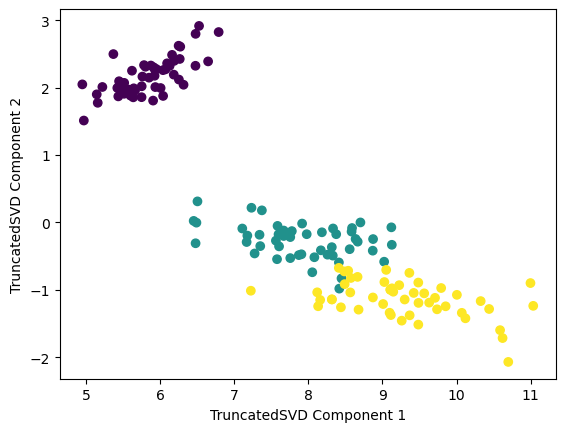

In [9]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
#2개의 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components = 2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

#산점도 2차원으로 TruncatedSVD 변환된 데이터 표현, 품종은 색깔로 구별
plt.scatter(x = iris_tsvd[:, 0], y = iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

- TruncatedSVD 변환 역시 PCA와 유사하게, 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음

- 사이킷런의 TruncatedSVD와 PCA 클래스 모두 SVD를 이용해 행렬 분해
- 아래와 같이 붓꽃 데이터를 스케일링으로 변환한 뒤에 TruncatedSVD와 PCA 클래스 변환을 해보면 두 개가 거의 동일함을 알 수 있음

Text(0.5, 1.0, 'PCA Transformed')

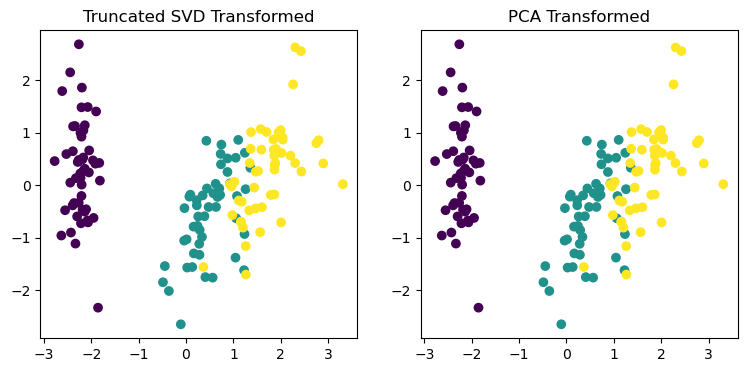

In [10]:
from sklearn.preprocessing import StandardScaler

#붓꽃 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

#스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

#스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

#TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

- 두 개의 변환 행렬 값과 원본 속성별 컴포넌트 비율값을 서로 비교해 보면 거의 같음을 알 수 있음

In [12]:
print((iris_pca-iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3434148140507225e-15
-9.974659986866641e-18


- 모두 0에 가까운 값이므로 2개의 변환이 동일함을 알 수 있음
- 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면, 사이킷런의 SVD와 PCA는 동일한 변환 수행
  <= PCA가 SVD 알고리즘으로 구현됨
- BUT PCA는 밀집행렬(Dense Matrix)에 대한 변환만 가능하며
- SVD는 희소행렬(Sparse Matrix)에 대한 변환도 가능
- SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에 사용됨
- SVD는 텍스트의 토픽 모델링 기법인 LSA(Latent Semantic Analysis)의 기반 알고리즘

## **05. NMF(Non-Negative Matrix Factorization)**

### **NMF 개요**

- NMF
  - Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사 (Low-Rank Approximation) 방식의 변형
  - 원본 행렬 내의 모든 원소 값이 양수라는 것이 보장되면, 다음과 같이 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법
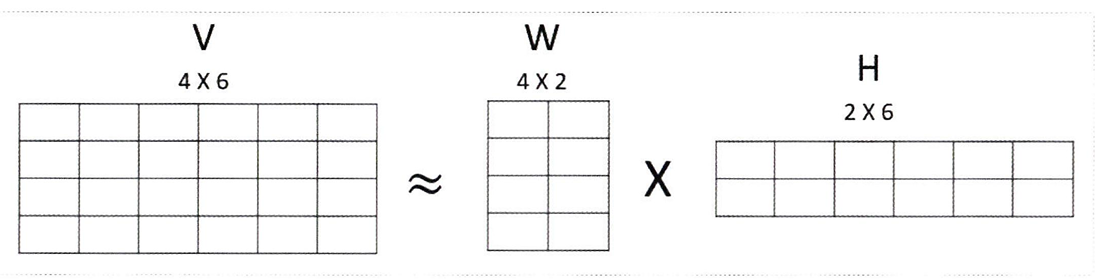
- 행렬분해 (Matrix Factorization)는 일반적으로 SVD와 같은 행렬 분해 기법을 통칭하는 것
- 분해된 행렬 (W, H)은 잠재 요소를 특성으로 가지게 됨
- 분해 행렬 W는 원본 행에 대해서 이 잠재 요소의 값이 얼마나 되는지에 대응
- 분해 행렬 H는 이 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성되었는지에 대응
- NMF는 SVD와 융사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용되고 있음
- 사이킷런에서 NMF는 NMF 클래스를 이용해 지원됨

C:\anaconda\Lib\site-packages\sklearn\decomposition\_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

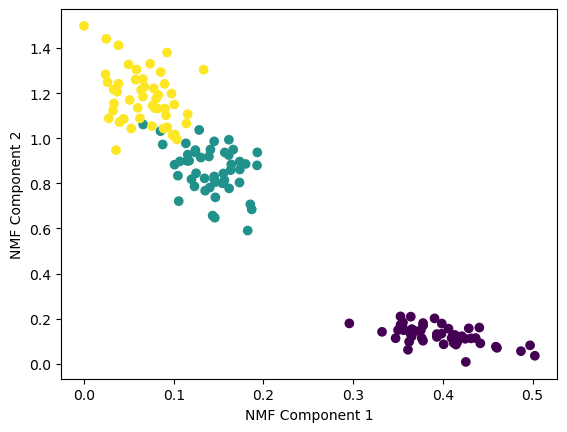

In [13]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0],y=iris_nmf[:,1],c=iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

- NMF도 SVD와 유사하게
  - 이미지 압축을 통한 패턴 인식
  - 텍스트의 토픽 모델링 기법
  - 문서 유사도 및 클러스터링
  - 영화 추천과 같은 추천 영역에 활발하게 적용됨
 
- 예시
  - 사용자의 상품(ex. 영화) 평가 데이터 세트인 사용자-평가 순위(user-Rating) 데이터 세트를 행렬 분해 기법을 통해 분해하면서
  - 사용자가 평가하지 않은 상품에 대한 잠재적인 요소를 추출해
  - 이를 통해 평가 순위(Rating)를 예측하고
  - 높은 순위로 예측된 상품을 추천  
 => 잠재 요소(Latent Factoring) 기반의 추천 방식

## **06. 정리**

- 많은 피처로 이루어진 데이터 세트를 PCA와 같은 차원 축소를 통해 더 직관적으로 이해 가능
- 차원 축소는 단순히 피처의 개수를 줄이는 것이 아니라, 이를 통해 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데 큰 의미를 가짐
- 많은 차원을 가지는 이미지나 텍스트에서 PCA, SVD 등의 차원 축소 알고리즘이 활발하게 사용됨

**PCA**
- 입력 데이터의 변동성이 가장 큰 축을 구하고
- 이 축에 직각인 축을 축소하려는 차원 개수만큼 구한 뒤
- 입력 데이터를 이 축들에 투영해 차원을 축소하는 방식
- 이를 위해 입력 데이터의 공분산 행렬을 기반으로 고유벡터(Eigenvector)를 생성하고
- 이렇게 구한 고유벡터에 입력 데이터를 선형 변환

**LDA**
- PCA와 매우 유사
- PCA가 입력 데이터 변동성의 가장 큰 축을 찾는 데 반해
- LDA는 입력 데이터의 결정값 클래스를 최대한으로 분리할 수 있는 축을 찾는 방식으로 차원 축소

**SVD & NMF**
- 매우 많은 피처 데이터를 가진 고차원 행렬을 두 개의 저차원 행렬로 분리
- 이를 통해 원본 행렬에서 잠재된 요소를 추출하기 때문에, 토픽 모델링이나 추천 시스템에서 활발히 사용됨